
####  Performing EDA (Exploratory Data Analysis) on The Titanic Dataset using  Logistic Regression ML algorithm

I am working of famous Titanic Dataset,for  Performing EDA (Exploratory Data Analysis) using  Logistic Regression ML algorithm.
To get the Titanic Dataset from Kaggle, use this link: (https://www.kaggle.com/vvkumar/titanic-dataset). 

NOTE:Written and Edited by VVigneshKumar

In [1]:
## Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 120

## The Titanic Dataset

In [56]:
df_train = pd.read_csv('titanic_dataframe_train.csv')

In [57]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA (Exploratory Data Analysis)


#### Look for Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [58]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

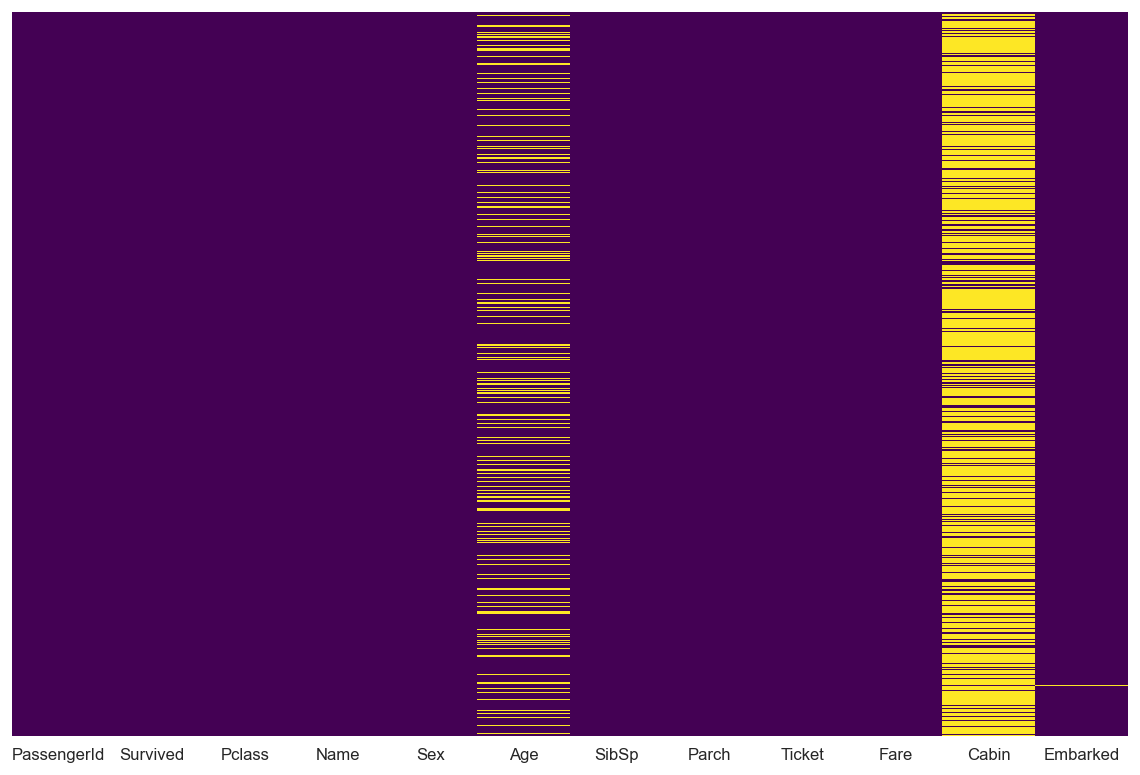

In [59]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
### corr() is used to find the pairwise correlation of all columns in the dataframe


<AxesSubplot:>

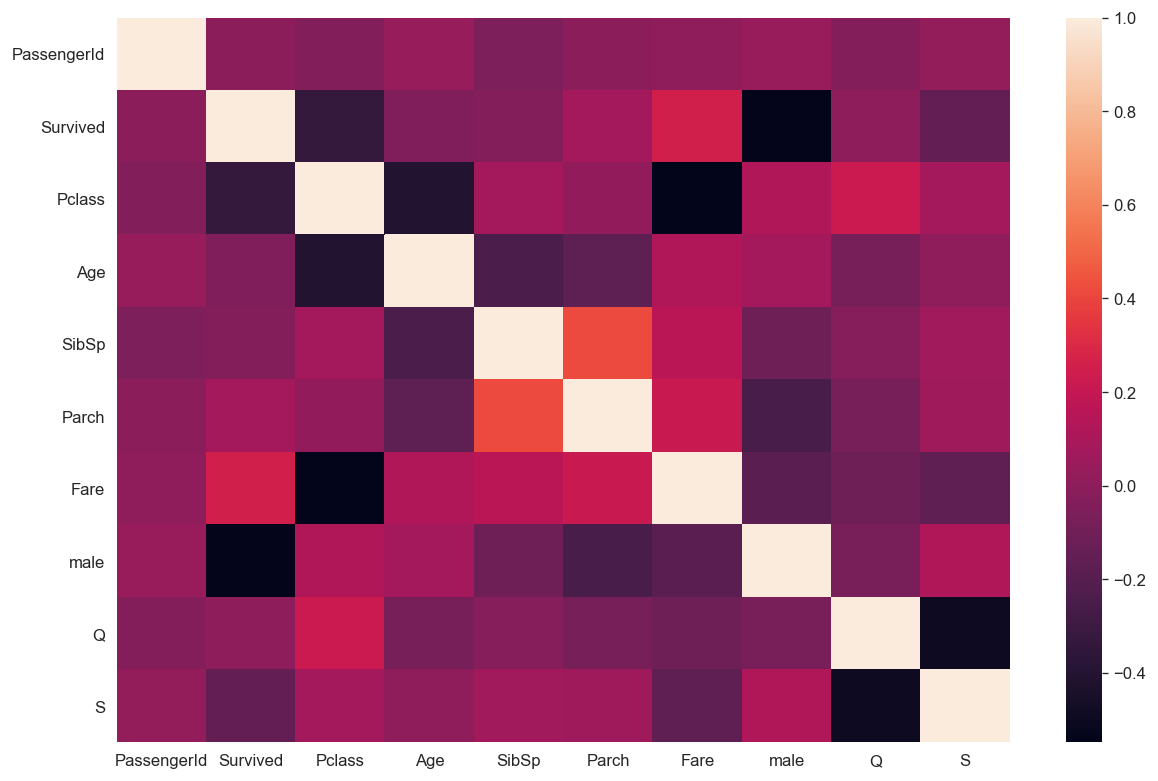

In [110]:
corrmap=df_train.corr()
sns.heatmap(corrmap)

<AxesSubplot:xlabel='Survived', ylabel='count'>

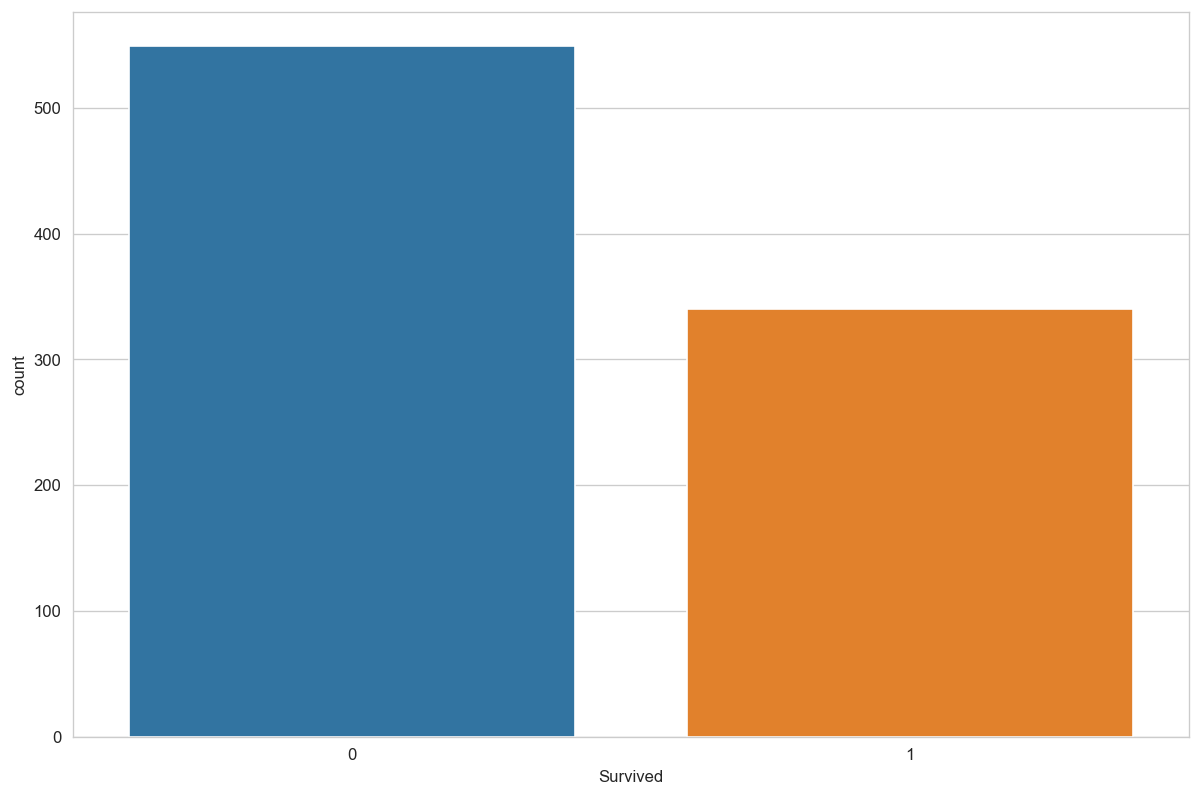

In [103]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

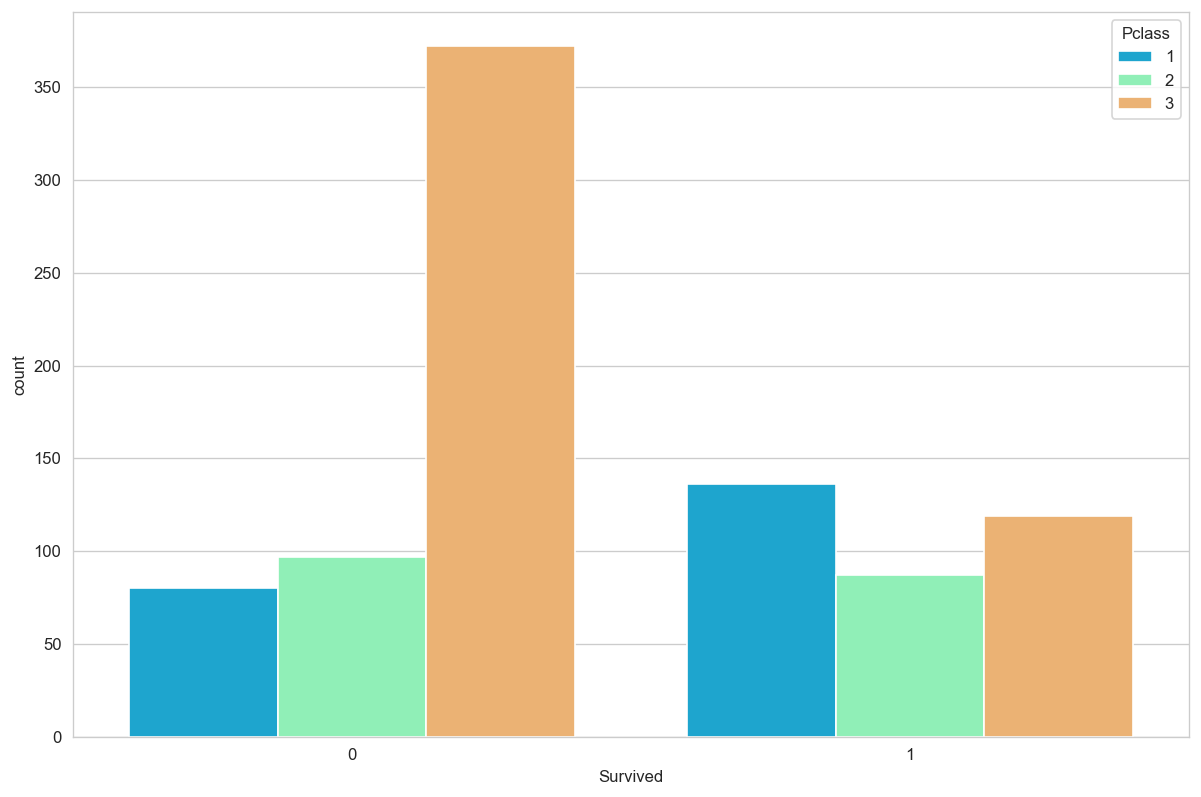

In [62]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df_train,palette='rainbow')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age'>

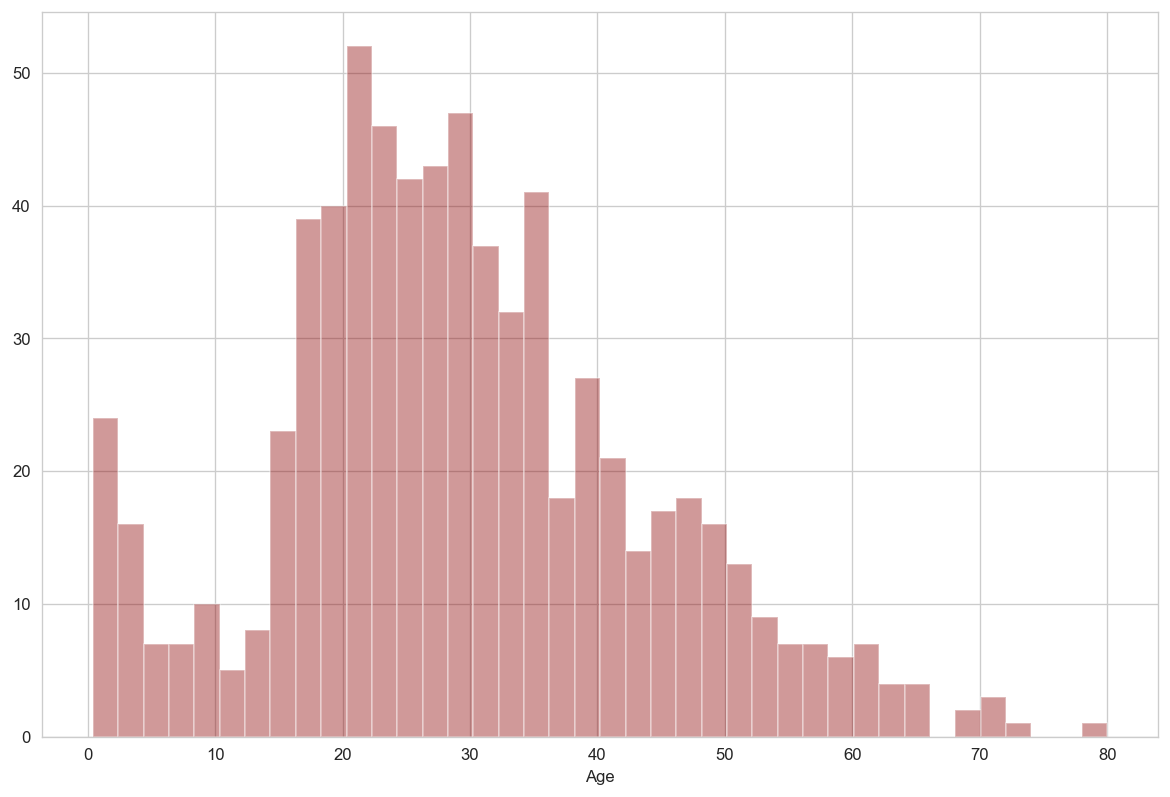

In [63]:
sns.distplot(df_train['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

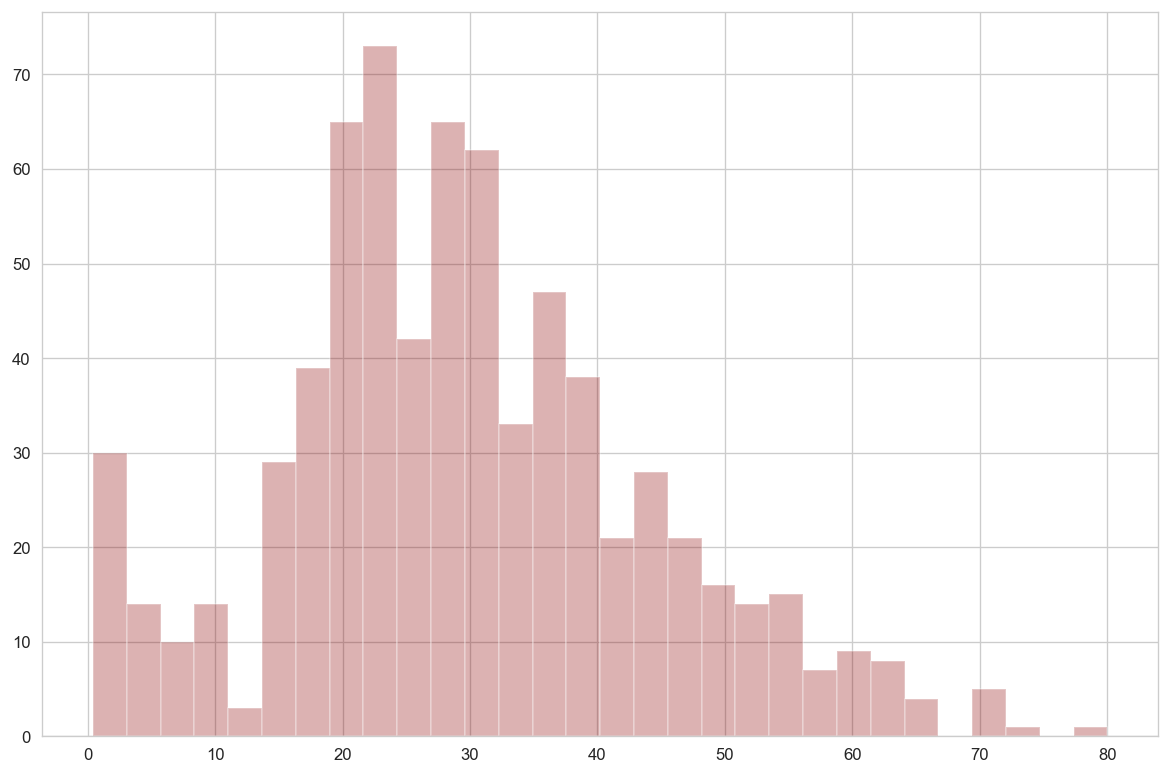

In [64]:
df_train['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

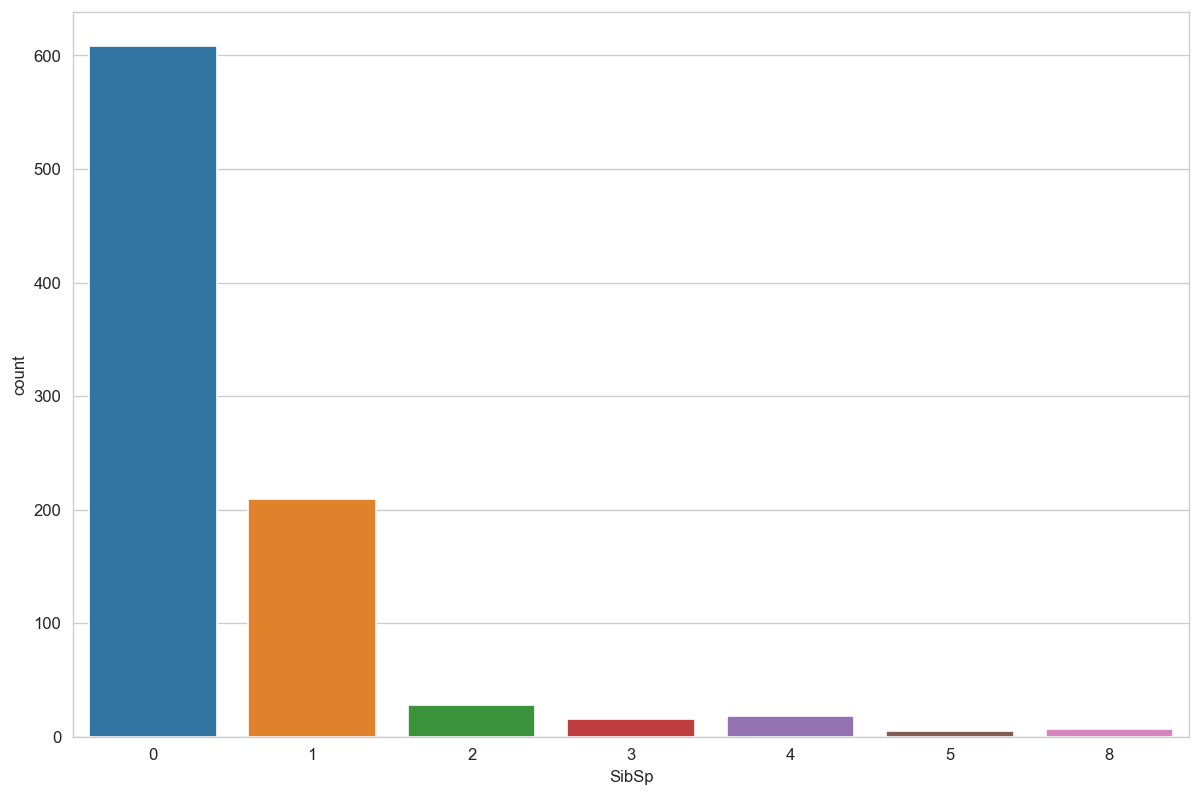

In [65]:
sns.countplot(x='SibSp',data=df_train)

<AxesSubplot:>

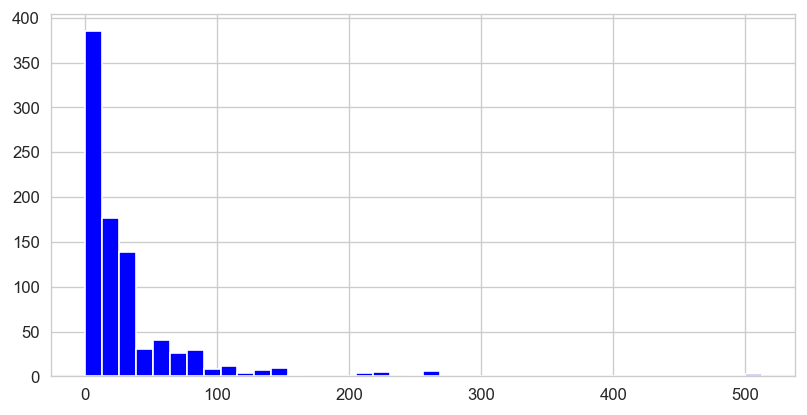

In [111]:
df_train['Fare'].hist(color='blue',bins=40,figsize=(8,4))

____
### Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

In [67]:
# !pip install cufflinks

In [68]:
import cufflinks as cf
cf.go_offline()

In [112]:
df_train['Fare'].iplot(kind='hist',bins=30,color='blue')

___
### Titanic Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

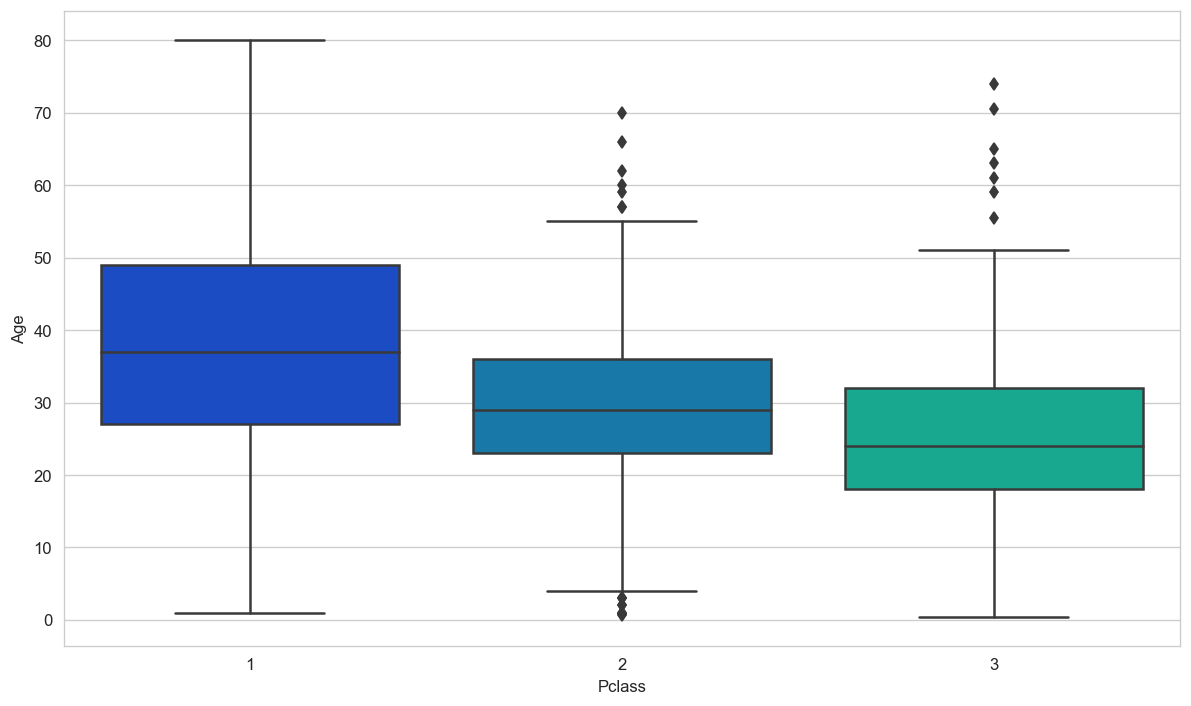

In [70]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [71]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [72]:
df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age,axis=1)

Now let us check that heat map again!

<AxesSubplot:>

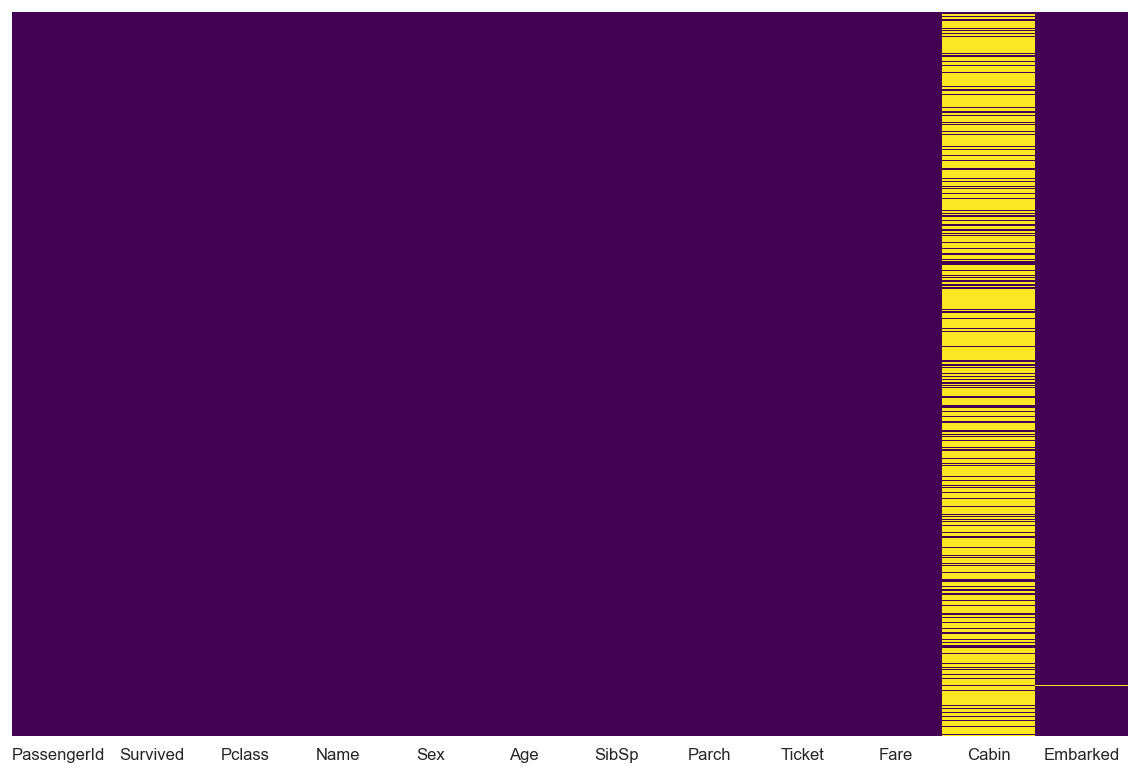

In [73]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Drop the Cabin column and the row in Embarked that is NaN.

In [74]:
df_train.drop('Cabin',axis=1,inplace=True)

In [75]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [76]:
df_train.dropna(inplace=True)

### Feature Engineering and visual representation of Extracted Features

(10,)


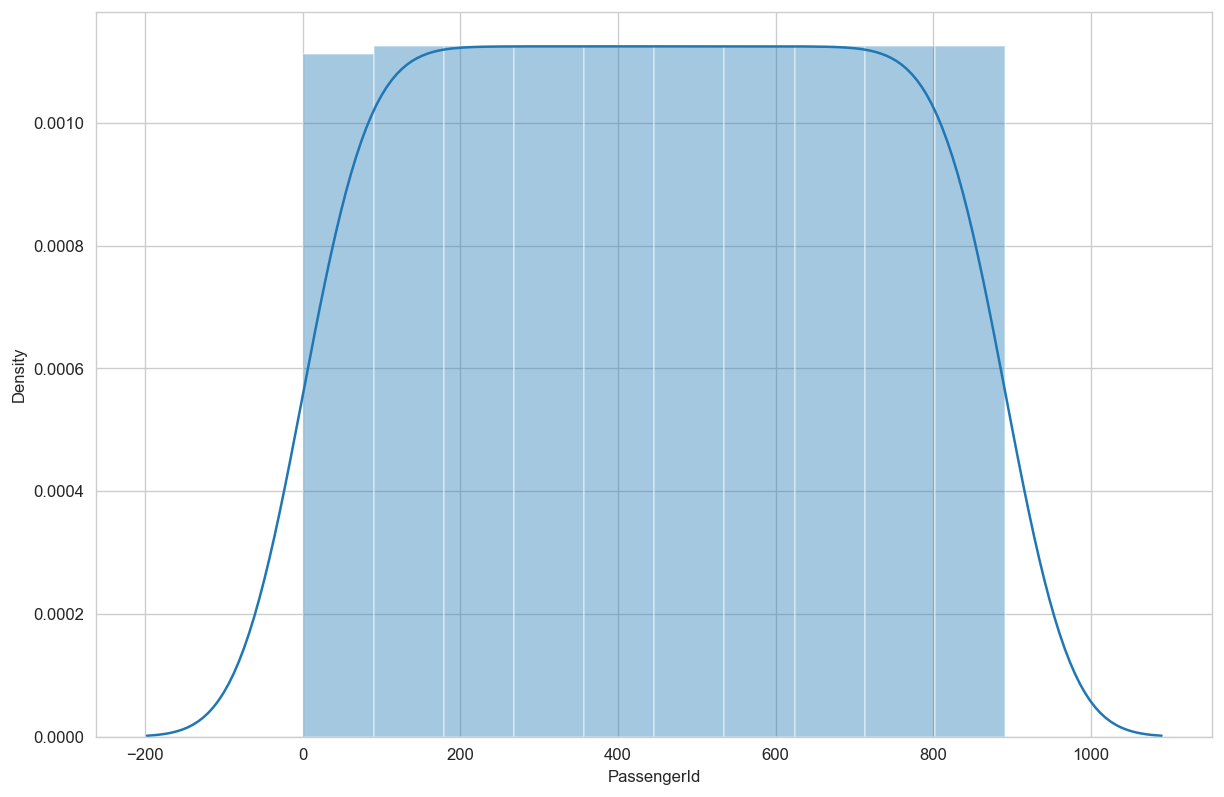

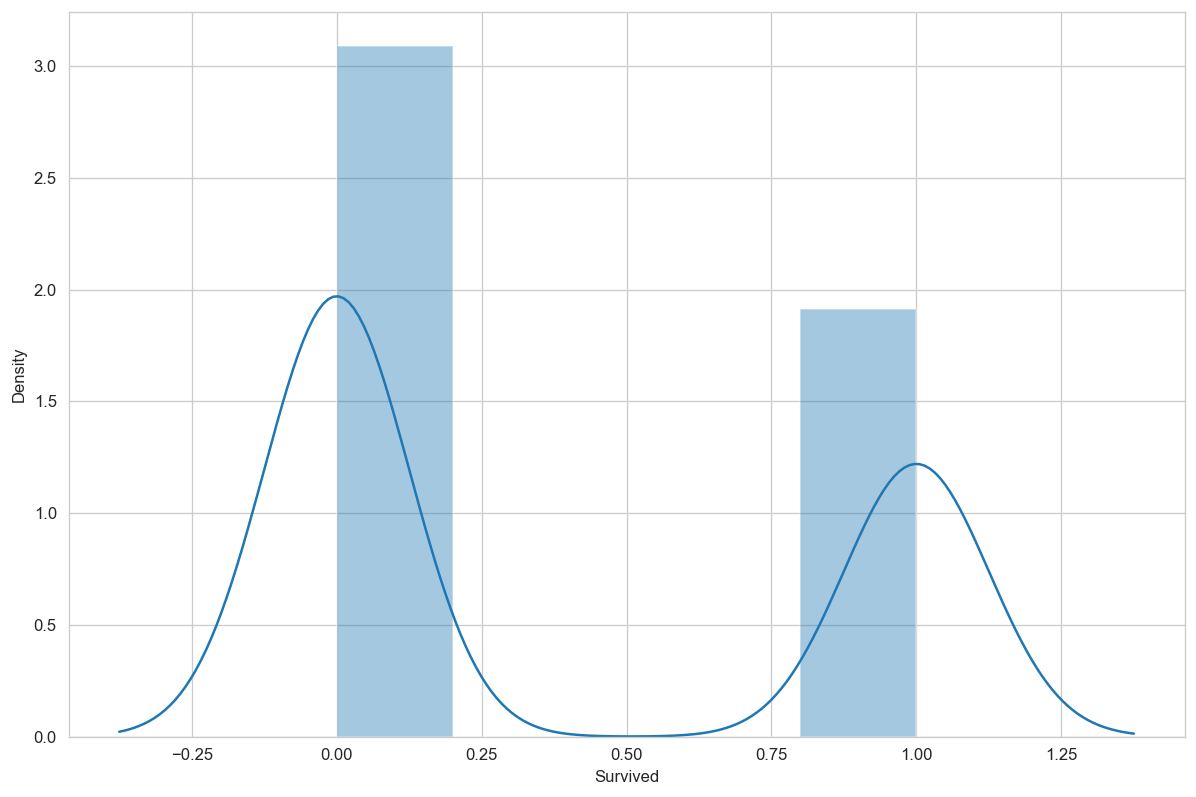

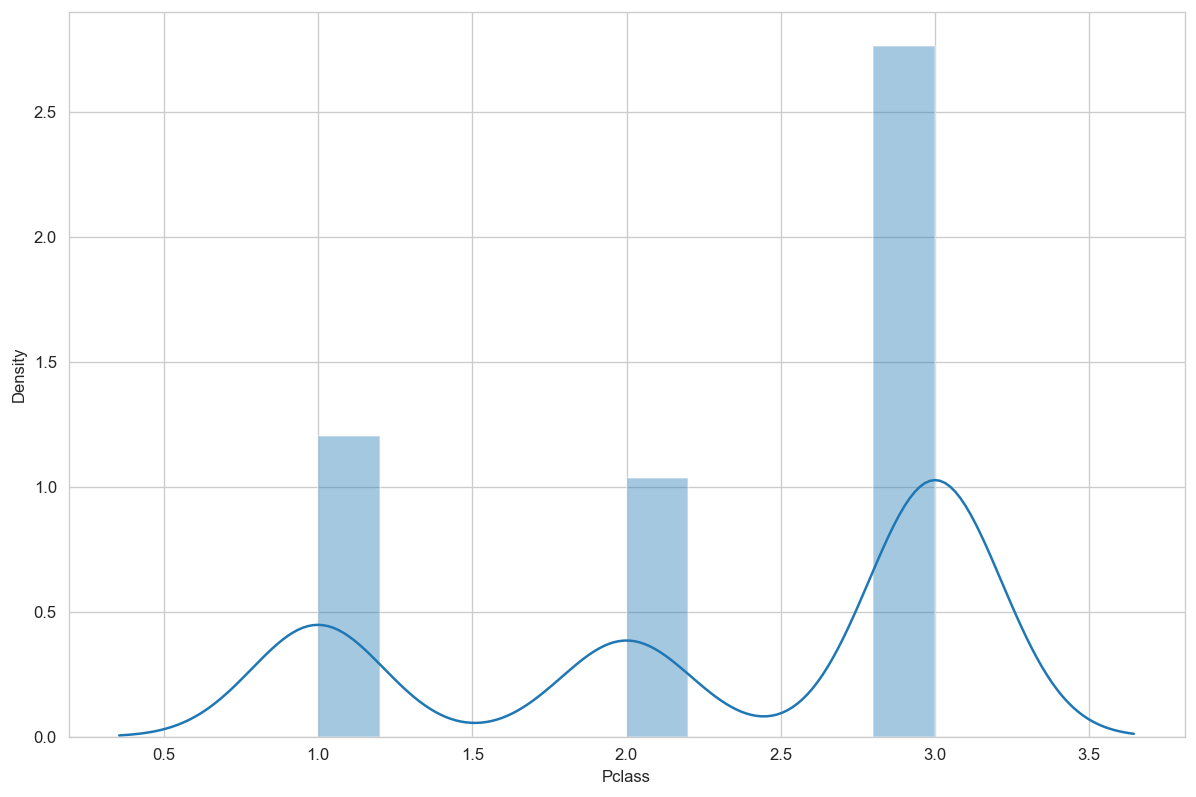

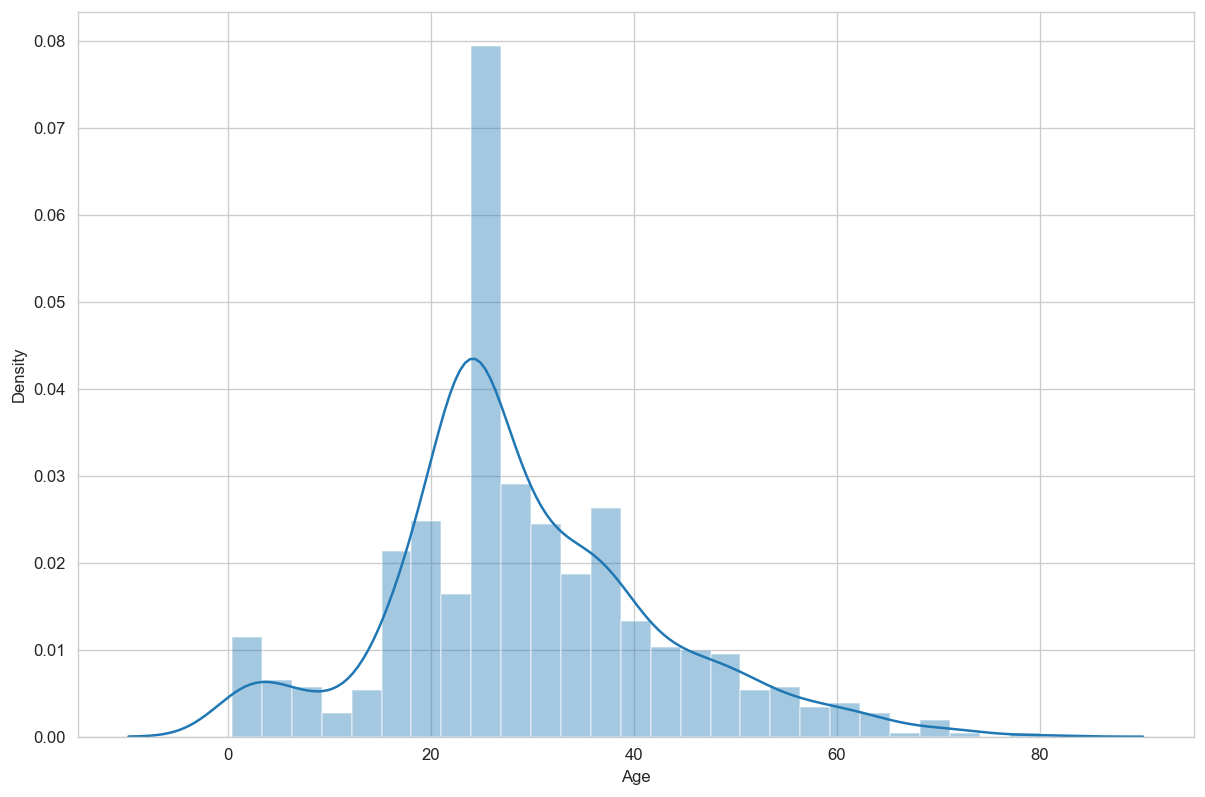

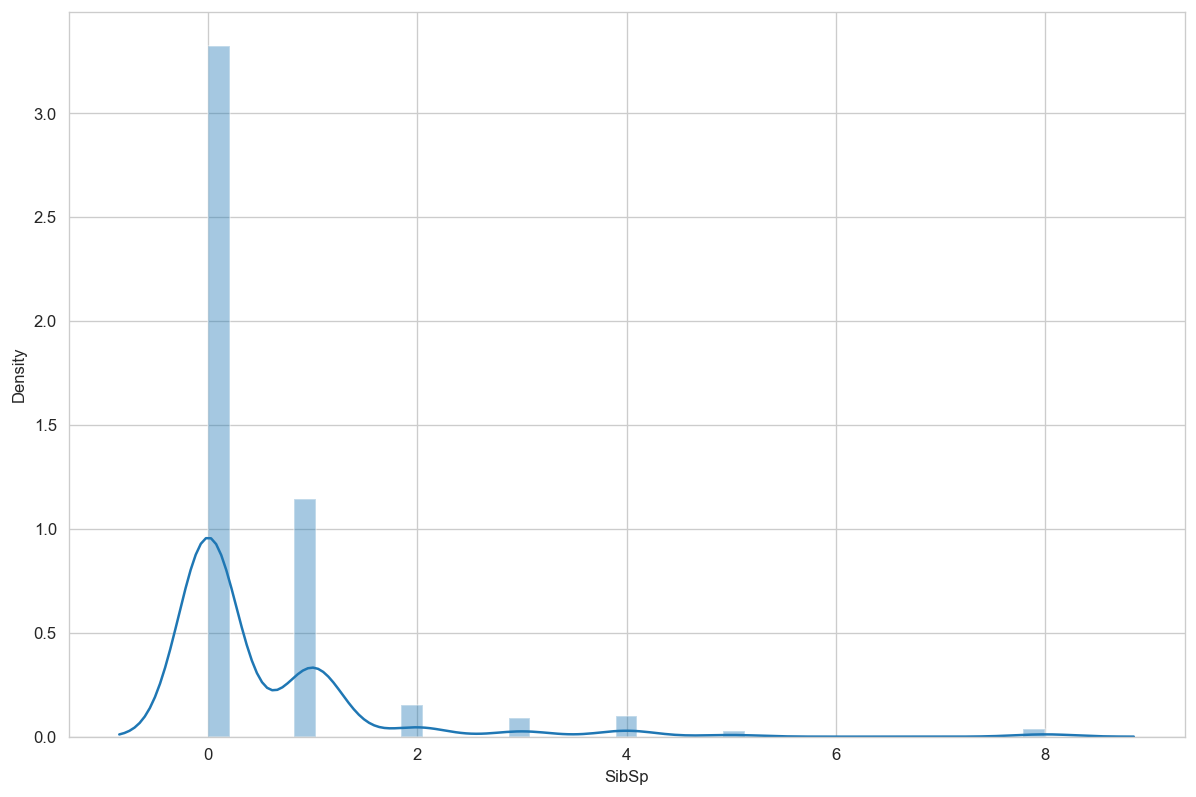

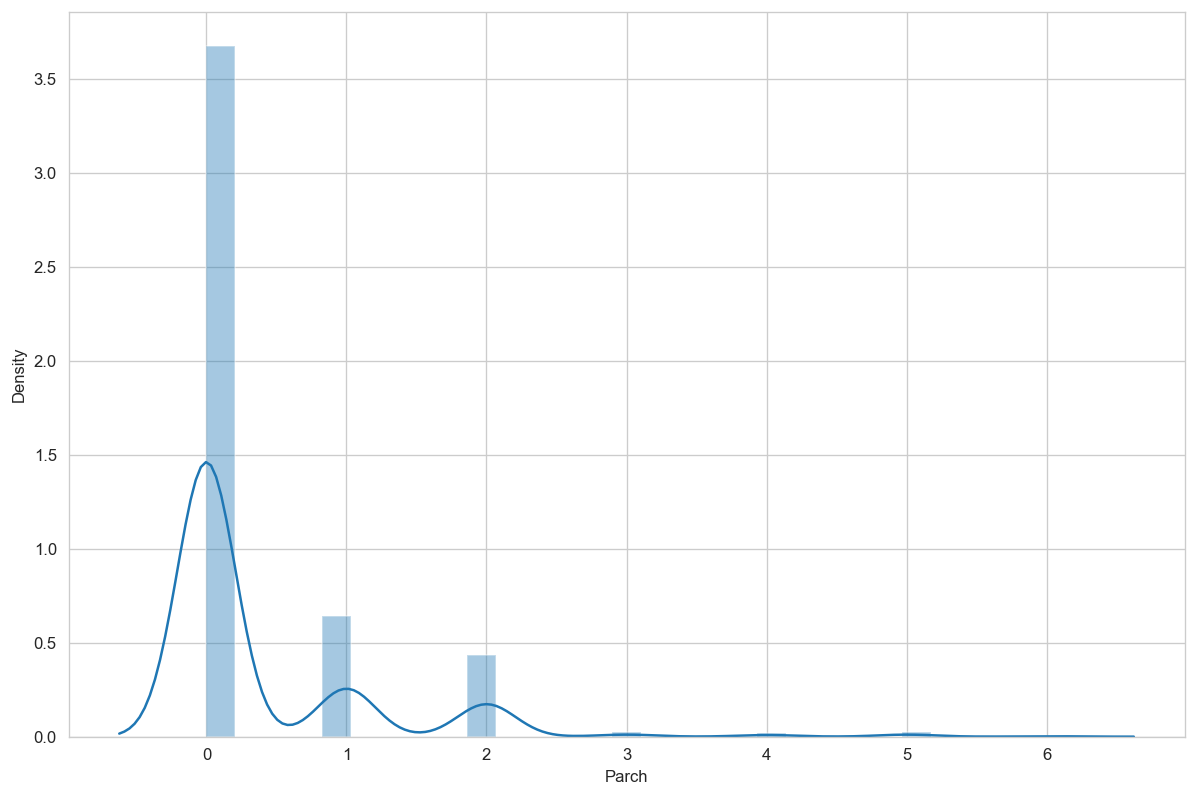

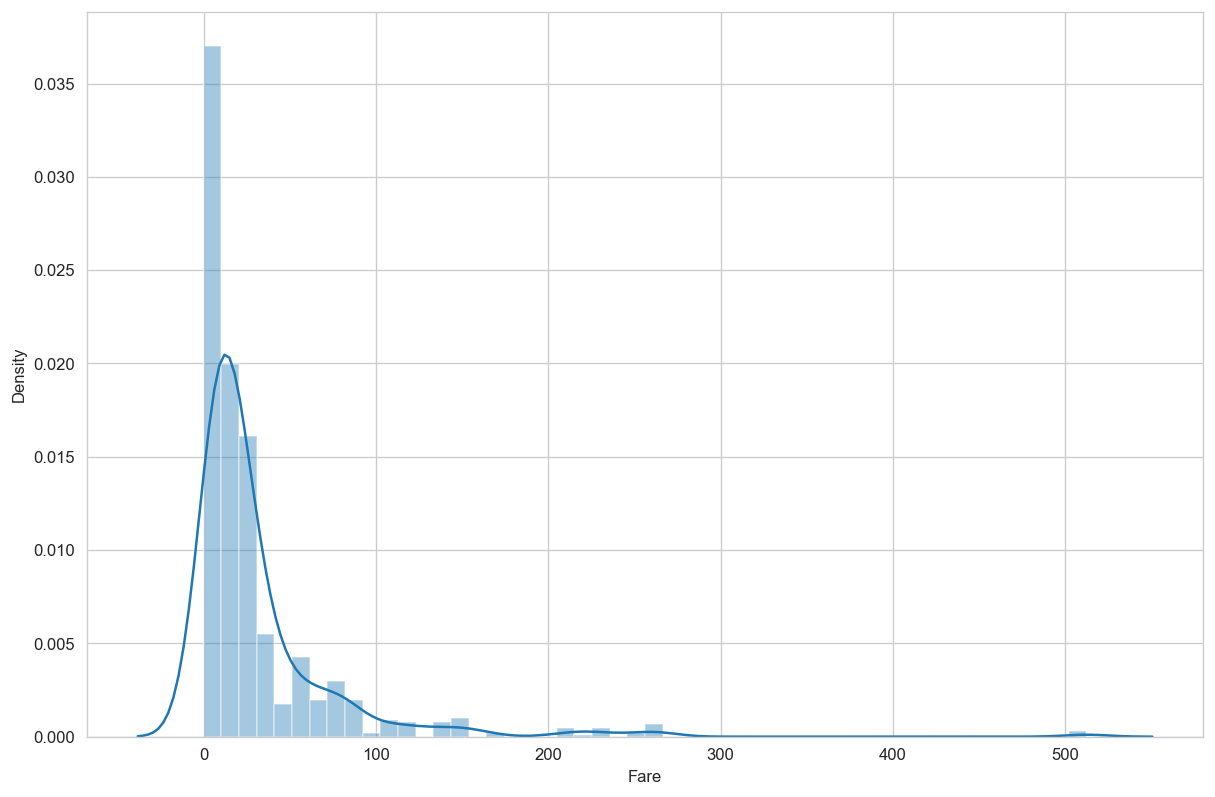

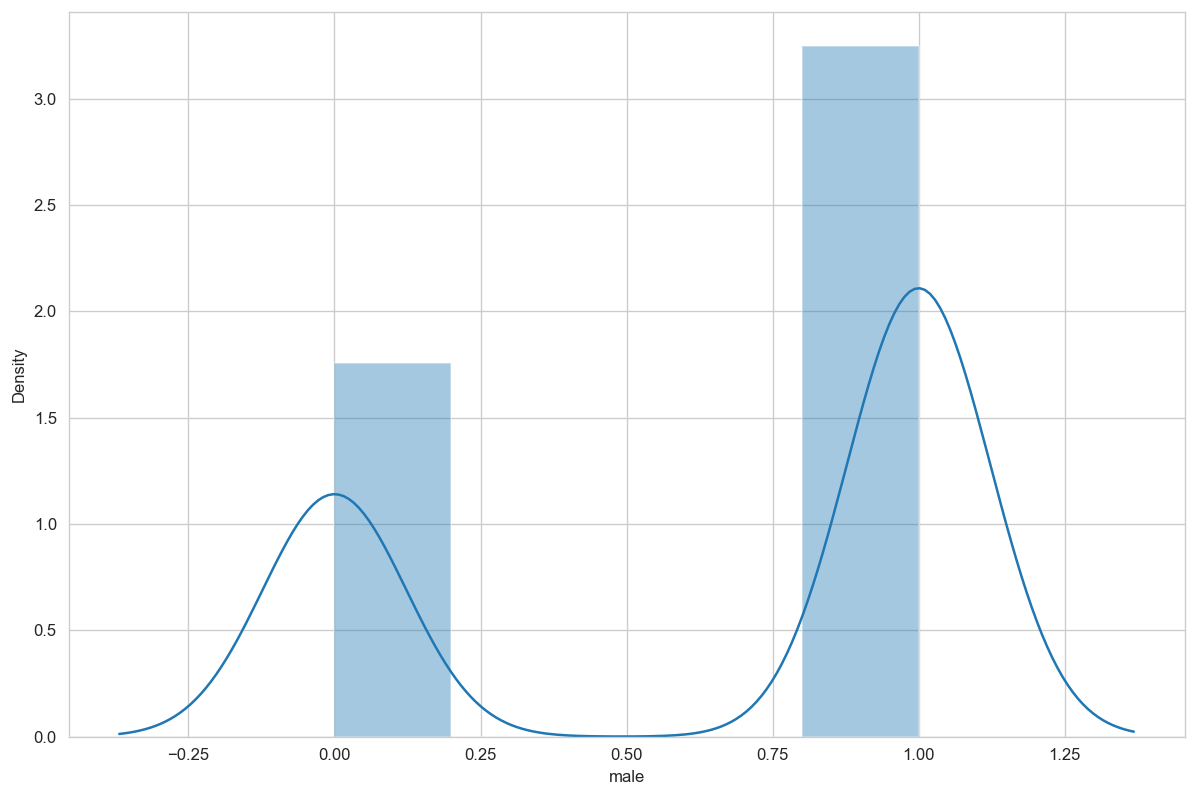

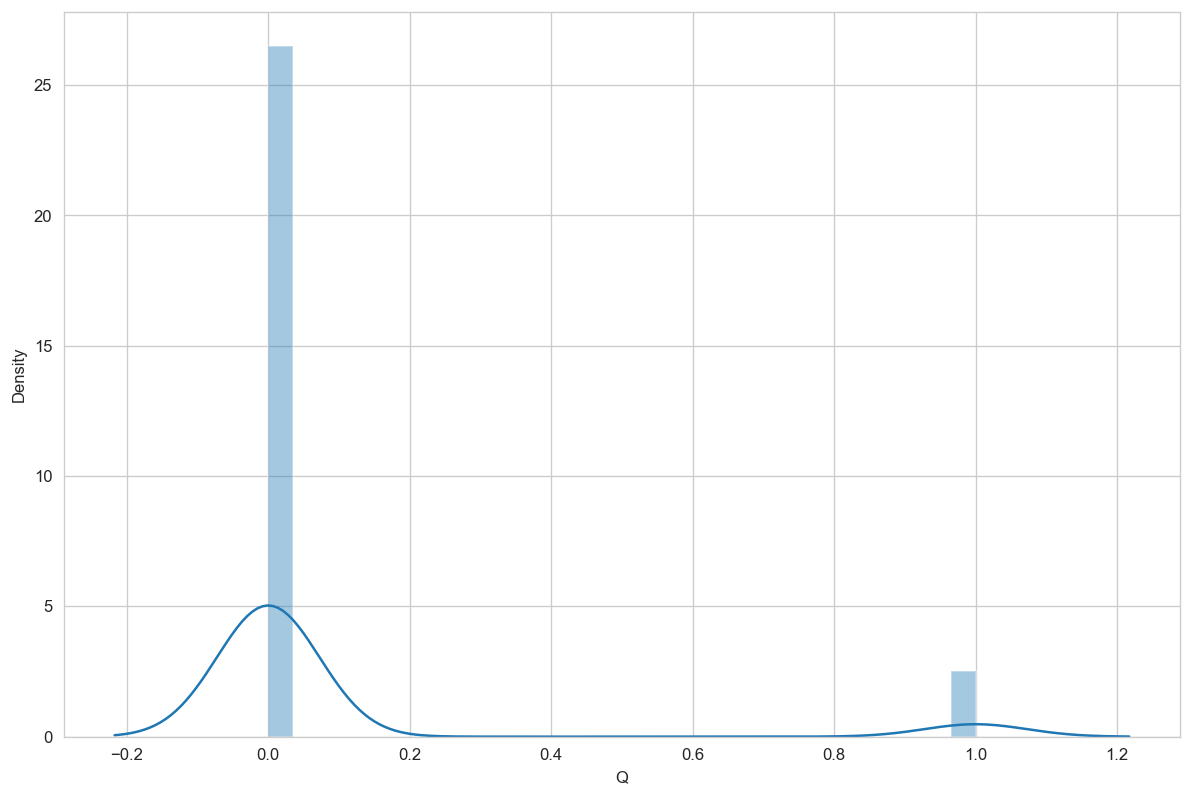

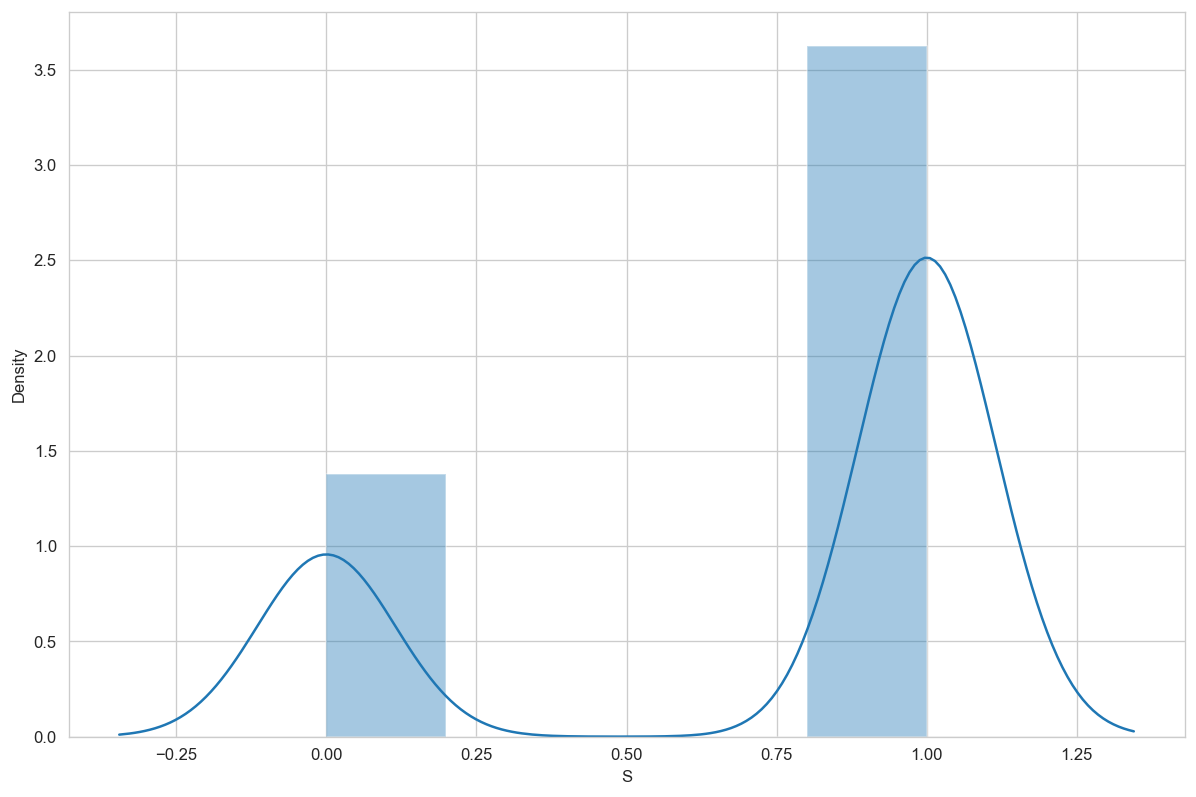

In [108]:
num_features = df_train.columns[df_train.dtypes != 'object']
print(num_features.shape)
num_features

import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


for i in num_features:
    plt.figure()
    sns.distplot(df_train[i])

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [78]:
pd.get_dummies(df_train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [79]:
sex = pd.get_dummies(df_train['Sex'],drop_first=True)
embark = pd.get_dummies(df_train['Embarked'],drop_first=True)

In [80]:
df_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [81]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [106]:
df_train = pd.concat([df_train,sex,embark],axis=1)

In [107]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [84]:
df_train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [85]:
df_train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Survived',axis=1), 
                                                    df_train['Survived'], test_size=0.30, 
                                                    random_state=101)

### Using LogisticRegression ML Model to  Train and Predict

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [90]:
predictions = logmodel.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix


In [92]:

cm=confusion_matrix(y_test,predictions)
print("confusion matrix :", cm)

confusion matrix : [[142  21]
 [ 53  51]]


#### Confusion Matrix for LogisticRegression

confusion matrix [[142  21]
 [ 53  51]]


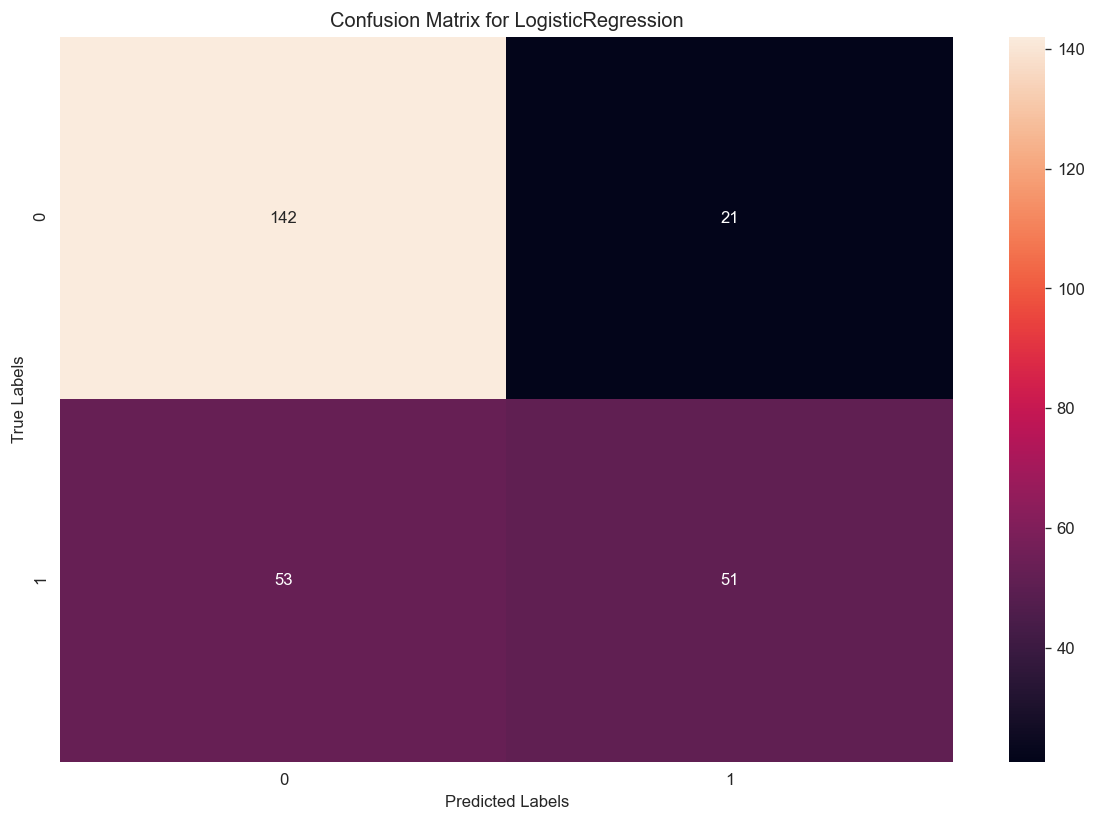

In [93]:
categories='auto'
print("confusion matrix",cm)
# plt.figure(figsize=(15,15))
# sns.heatmap(cm,  annot=True, fmt="")
sns.heatmap(cm,annot=True,fmt="", xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix for LogisticRegression")
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show() 


In [94]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7228464419475655

Let's move on to evaluate our model!

#### Evaluation of Logistic Regression Model

We can check precision,recall,f1-score using classification report!

In [97]:
from sklearn.metrics import classification_report

###  Complete Classification Report of the Proposed Model


In [98]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       163
           1       0.71      0.49      0.58       104

    accuracy                           0.72       267
   macro avg       0.72      0.68      0.69       267
weighted avg       0.72      0.72      0.71       267



### Thanks for accessing my work, pl. give a Like if you appreciate my code!!!